In [1]:
import netCDF4
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import xarray as xr

In [2]:
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")

In [3]:
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [4]:
ds.data_vars

Data variables:
    sst      (time, lat, lon) float32 ...

In [5]:
ds.sst.groupby('time.month')

DataArrayGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

In [6]:
# Get the data from about the dateline to the South American coast (5N-5S, 170W-120W). 
# https://nci-data-training.readthedocs.io/en/latest/_notebook/climate/1_06_Xarray_calculate_Nino34_time_series_for_CESM2_CMIP6.html

In [7]:
sst_clim = ds.sst.where(( ds.sst.lat<5) & (ds.sst.lat>-5) & (ds.sst.lon>190) & (ds.sst.lon<240), drop=True).groupby('time.month').mean()
sst_clim

<xarray.DataArray 'sst' (month: 12, lat: 5, lon: 24)>
array([[[28.46709 , 28.329628, 28.206432, ..., 25.694847, 25.547432,
         25.407318],
        [27.915398, 27.768072, 27.63241 , ..., 25.182688, 25.050482,
         24.91376 ],
        [27.550066, 27.402925, 27.264263, ..., 25.04506 , 24.939613,
         24.821255],
        [27.594133, 27.458607, 27.326015, ..., 25.613266, 25.548328,
         25.472971],
        [27.871954, 27.765362, 27.653118, ..., 26.391823, 26.36988 ,
         26.3484  ]],

       [[28.406334, 28.285015, 28.18575 , ..., 26.328262, 26.240774,
         26.166866],
        [27.779905, 27.645334, 27.53449 , ..., 25.836323, 25.759432,
         25.692144],
        [27.37174 , 27.229572, 27.106054, ..., 25.652273, 25.599237,
         25.549782],
        [27.433657, 27.294996, 27.164375, ..., 26.112968, 26.10608 ,
         26.09529 ],
        [27.76656 , 27.654293, 27.536156, ..., 26.733833, 26.763283,
...
         24.959532],
        [28.266651, 28.103579, 27.946999, ..., 24.733768, 24.558685,
         24.39087 ],
        [27.965519, 27.80641 , 27.655682, ..., 24.605192, 24.439455,
         24.283432],
        [28.10055 , 27.961477, 27.827131, ..., 25.324549, 25.181112,
         25.047338],
        [28.475353, 28.364399, 28.257   , ..., 26.35474 , 26.244923,
         26.143816]],

       [[28.663803, 28.517038, 28.376226, ..., 25.427797, 25.248241,
         25.07334 ],
        [28.154438, 27.991566, 27.836725, ..., 24.865425, 24.703024,
         24.541676],
        [27.812155, 27.65246 , 27.500687, ..., 24.72636 , 24.582592,
         24.43548 ],
        [27.881811, 27.743273, 27.606321, ..., 25.381954, 25.26573 ,
         25.148493],
        [28.174547, 28.068707, 27.959867, ..., 26.315414, 26.240398,
         26.173206]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 192.0 194.0 196.0 198.0 ... 232.0 234.0 236.0 238.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [8]:
# Get the data from about the dateline to the South American coast (5N-5S, 170W-120W). 
# https://nci-data-training.readthedocs.io/en/latest/_notebook/climate/1_06_Xarray_calculate_Nino34_time_series_for_CESM2_CMIP6.html

In [9]:
da = ds.sst.where((sst_clim.lat<5) & (sst_clim.lat>-5) & (sst_clim.lon>190) & (sst_clim.lon<240), drop=True)

In [10]:
group_data = da.groupby('time.month')

## Problem 1.1

In [11]:
sst_anom = (group_data - sst_clim).mean(dim=['lon','lat'])

In [12]:
sst_anom

<xarray.DataArray 'sst' (time: 684)>
array([-0.31351063, -0.45896783, -0.2556806 , -0.1741504 , -0.16364391,
       -0.3484824 , -0.12703694,  0.03726905, -0.13615273, -0.35591492,
       -0.33872   , -0.1935383 , -0.16614863, -0.11572211, -0.22993377,
       -0.1859685 ,  0.06971741,  0.28628647, -0.01837681, -0.3822652 ,
       -0.7583192 , -0.7789171 , -0.48657405, -0.41433957, -0.43796614,
       -0.45803782, -0.43346673, -0.46354   , -0.55519027, -0.41133696,
       -0.2589079 , -0.30123508, -0.66656905, -0.65647215, -0.8085044 ,
       -0.858395  , -0.7023807 , -0.3417946 ,  0.09780066,  0.18661268,
       -0.0776523 ,  0.09652939,  0.7201062 ,  0.81331116,  0.73513424,
        0.84834784,  0.9135263 ,  1.1076455 ,  0.8753615 ,  0.5462109 ,
       -0.1207674 , -0.61541176, -0.8483269 , -0.92812085, -0.7749995 ,
       -1.0736378 , -1.2521061 , -1.1880773 , -1.291925  , -1.1811842 ,
       -0.7756255 , -0.3596037 , -0.10422482, -0.06650309,  0.2724961 ,
        0.5976876 ,  0.81711537,  1.2550336 ,  1.2956487 ,  1.5553159 ,
        1.6132514 ,  1.4645653 ,  1.1941435 ,  0.9305264 ,  1.0009937 ,
        0.5635909 , -0.11626069,  0.17732905,  0.22042015, -0.17296425,
       -0.25228724, -0.3288145 , -0.27323246, -0.39433798, -0.37713185,
       -0.37675282, -0.5581313 , -0.78061026, -0.30227768,  0.01500947,
       -0.02529953, -0.18183456, -0.6234849 , -0.5165802 , -0.42210147,
       -0.5013365 , -0.781009  , -0.9383933 , -0.84543794, -0.5994367 ,
...
       -0.07343054, -0.37950134, -0.7353136 , -0.86450803, -0.64748347,
       -0.43704906, -0.03788172,  0.3685061 ,  0.5309661 ,  0.6148541 ,
        0.7020315 ,  0.79288065,  1.0621616 ,  1.5818633 ,  1.8748902 ,
        1.6939989 ,  1.4200892 ,  1.0934309 ,  0.7478152 ,  0.22768028,
       -0.37466666, -0.8292867 , -1.2181307 , -1.4481441 , -1.4610151 ,
       -1.3777548 , -1.3722786 , -1.4896235 , -1.0678906 , -0.87148565,
       -0.5100189 , -0.13943343,  0.04279358, -0.11032894, -0.29610226,
       -0.578225  , -0.73928946, -0.9999153 , -0.99670506, -0.70281035,
       -0.5828208 , -0.3121814 , -0.15671684, -0.09239383,  0.07179114,
        0.15526141,  0.37769654,  0.8665014 ,  0.6522318 ,  0.52167135,
       -0.38315874, -0.7026714 , -0.5517198 , -0.37319368,  0.11032618,
       -0.01396751, -0.21981126, -0.26639163, -0.29216132, -0.21287067,
       -0.08333986, -0.15563992, -0.40683237, -0.5444705 , -0.6975954 ,
       -0.4113806 ,  0.00303613,  0.3466305 ,  0.19456339,  0.06329315,
       -0.0303648 ,  0.23409541,  0.49318406,  0.84765524,  0.705019  ,
        0.6066603 ,  0.53578144,  0.5867806 ,  0.89051723,  0.99051785,
        1.1324136 ,  1.3986186 ,  1.6460841 ,  1.9098794 ,  2.3389719 ,
        2.7248487 ,  2.536103  ,  2.4869225 ,  2.1596422 ,  1.6225097 ,
        1.1481518 ,  0.45316795, -0.1348192 , -0.59302264, -0.67224574,
       -0.6549889 , -0.91441596, -0.99456   , -0.88307303], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

## Problem 1.2

In [13]:
sst_anom = sst_anom.sel(time=slice('2000-01','2020-12'))

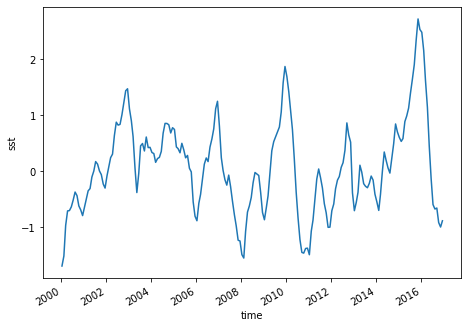

In [14]:
# sst_anom.sel(lon=294.1, lat=22.5, method='nearest').plot()
sst_anom.plot(size=5)

In [15]:
# I got inspired by reading https://nci-data-training.readthedocs.io/en/latest/_notebook/climate/1_06_Xarray_calculate_Nino34_time_series_for_CESM2_CMIP6.html

In [16]:
climatology_std = da.sel(time=slice('2000','2020')).std()

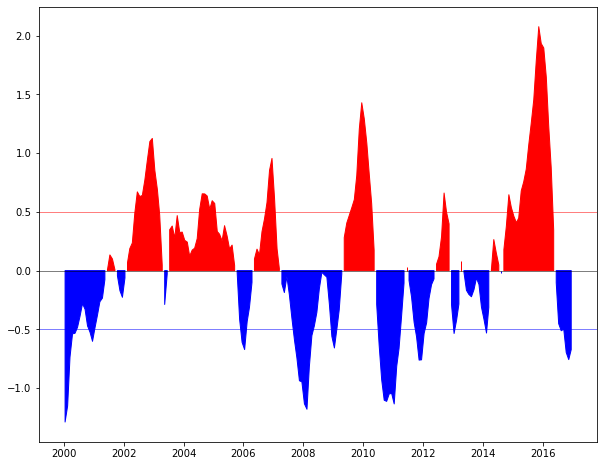

In [17]:
fig = plt.figure(figsize=(10, 8))
d = (sst_anom.rolling(time=1).mean() / climatology_std)
plt.axhline(0,color='black',lw=0.5)
plt.axhline(0.5,color='red',linewidth=0.5)
plt.axhline(-0.5,color='blue',linewidth=0.5)
plt.fill_between(d.time.values, d.where(d>=0).values, 0, color='red')
plt.fill_between(d.time.values, d.where(d<0).values, -0, color='blue')

# Problem set 2.1

In [18]:
ds = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")

In [19]:
ds

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

In [20]:
ds.data_vars

Data variables:
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    toa_cre_sw_mon               (time, lat, lon) float32 ...
    toa_cre_lw_mon               (time, lat, lon) float32 ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...

In [21]:
# toa_sw_all_mon: Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions data
# toa_lw_all_mon: Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions data
# toa_net_all_mon: Top of The Atmosphere Net Flux, Monthly Means, All-Sky conditions data
# toa_sw_clr_mon: Top of The Atmosphere Shortwave Flux, Monthly Means, Clear-Sky conditions data
# toa_lw_clr_mon: Top of The Atmosphere Longwave Flux, Monthly Means, Clear-Sky conditions data
# toa_net_clr_mon: Top of The Atmosphere Net Flux, Monthly Means, Clear-Sky conditions data
# toa_cre_sw_mon: Top of The Atmosphere Cloud Radiative Effects Shortwave Flux, Monthly Means data
# toa_cre_lw_mon: Top of The Atmosphere Cloud Radiative Effects Longwave Flux, Monthly Means data
# toa_cre_net_mon: Top of The Atmosphere Cloud Radiative Effects Net Flux, Monthly Means data
# solar_mon: Incoming Solar Flux, Monthly Means data

In [22]:
ds.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_t

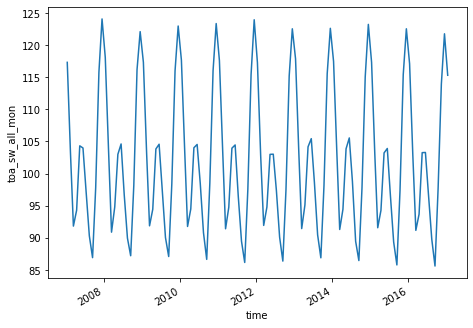

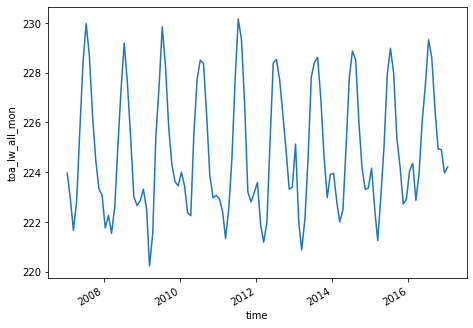

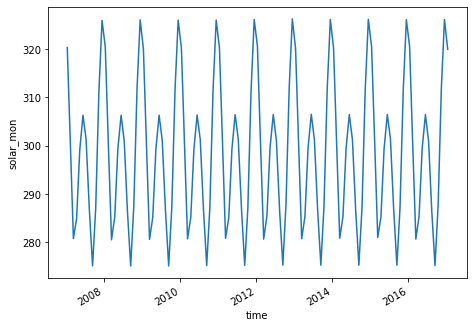

In [23]:
ds.toa_sw_all_mon.groupby('time.month').mean(dim=['lon','lat']).sel(time=slice('2007','2017')).plot(size=5)
ds.toa_lw_all_mon.groupby('time.month').mean(dim=['lon','lat']).sel(time=slice('2007','2017')).plot(size=5)
ds.solar_mon.groupby('time.month').mean(dim=['lon','lat']).sel(time=slice('2007','2017')).plot(size=5)

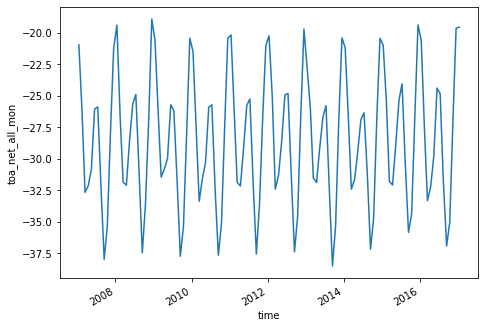

In [24]:
ds.toa_net_all_mon.groupby('time.month').mean(dim=['lon','lat']).sel(time=slice('2007','2017')).plot(size=5)        

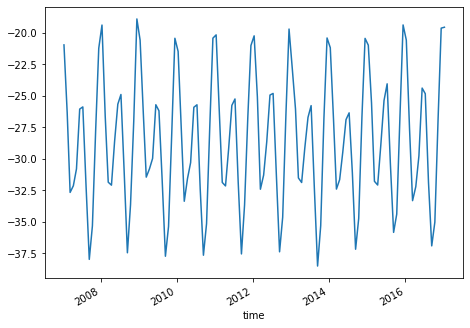

In [26]:
(ds.solar_mon.groupby('time.month').mean(dim=['lon','lat'])-ds.toa_lw_all_mon.groupby('time.month').mean(dim=['lon','lat'])-ds.toa_sw_all_mon.groupby('time.month').mean(dim=['lon','lat'])).sel(time=slice('2007','2017')).plot(size=5)

# Problem 2.2

# incoming solar

In [27]:
(ds.toa_sw_all_mon.groupby('time.month').mean() + ds.toa_lw_all_mon.groupby('time.month').mean()).mean(dim=['lon','lat']).mean()

<xarray.DataArray ()>
array(327.05405, dtype=float32)

# Outgoing longwave

In [29]:
(ds.toa_lw_all_mon.groupby('time.month') - ds.toa_lw_clr_mon.groupby('time.month').mean()).mean(dim=['lon','lat']).sel(time=slice('2007','2017')).mean()

<xarray.DataArray ()>
array(-23.64508, dtype=float32)

# Outgoing shortwave

In [27]:
(ds.toa_sw_all_mon.groupby('time.month') - ds.toa_sw_clr_mon.groupby('time.month').mean()).mean(dim=['lon','lat']).sel(time=slice('2007','2017')).mean()

<xarray.DataArray ()>
array(39.90895, dtype=float32)

# Problem 2.3

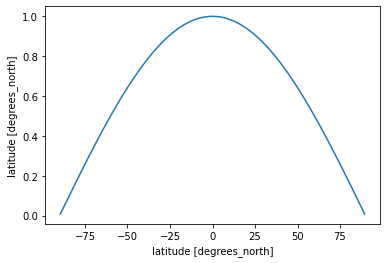

In [28]:
weights=np.cos(np.deg2rad(ds.lat))
weights.plot()

Text(0.5, 0, 'Latitude')

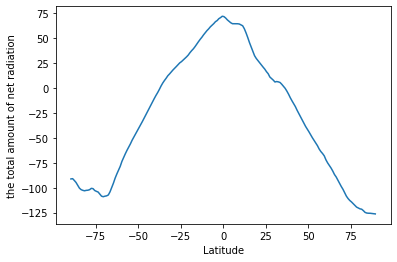

In [29]:
# ds.toa_net_all_mon.isel(time=1, lon=1).weighted(weights).mean().plot()
fig,ax=plt.subplots()
ax.plot(ds.lat,ds.toa_net_all_mon.weighted(weights).mean(dim=['time','lon']))
ax.set_ylabel('the total amount of net radiation')
ax.set_xlabel('Latitude')

# Problem 2.4

In [30]:
# cldarea_total_daynight_mon

In [31]:
d = ds.cldarea_total_daynight_mon

In [32]:
d

<xarray.DataArray 'cldarea_total_daynight_mon' (time: 203, lat: 180, lon: 360)>
[13154400 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 2000-03-15 2000-04-15 ... 2017-01-15
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Attributes:
    long_name:      Cloud Area Fraction, Monthly Means, Daytime-and-Nighttime...
    standard_name:  Cloud Area Fraction - Daytime-and-Nighttime
    CF_name:        cloud_area_fraction
    units:          percent
    valid_min:            0.00000
    valid_max:            100.000

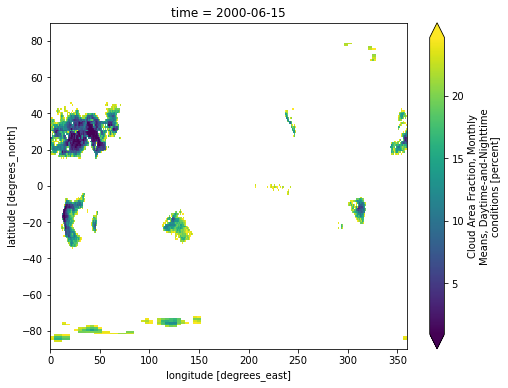

In [33]:
# low area
d.where(d<= 25).isel(time=3).plot(robust=True, figsize=(8, 6))

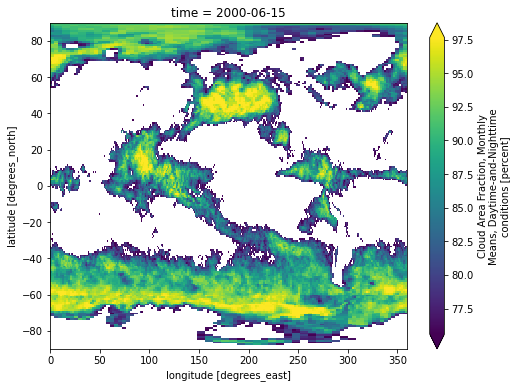

In [34]:
# hight area
d.where(d>=75).isel(time=3).plot(robust=True, figsize=(8, 6))

# Problem 2.5

In [35]:
# Problem 2.5
sd=ds.toa_sw_all_mon*xr.where(np.isnan(d.where(d<=25))==False,1,0)
ld=ds.toa_lw_all_mon*xr.where(np.isnan(d.where(d<=25))==False,1,0)

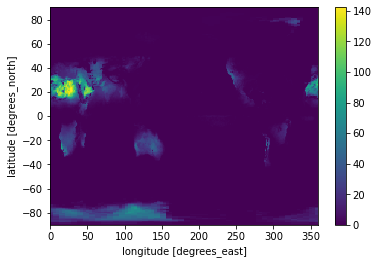

In [36]:
# shortwave 
sd.mean(dim='time').plot()

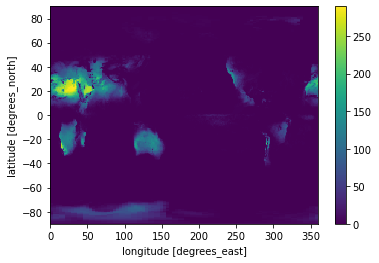

In [37]:
# longwave 
ld.mean(dim='time').plot()

In [38]:
sd.weighted(weights).mean()

<xarray.DataArray ()>
array(3.96557004)

In [39]:
ld.weighted(weights).mean()

<xarray.DataArray ()>
array(12.19363594)

In [40]:
sd=ds.toa_sw_all_mon*xr.where(np.isnan(d.where(d>=75))==False,1,0)
ld=ds.toa_lw_all_mon*xr.where(np.isnan(d.where(d>=75))==False,1,0)

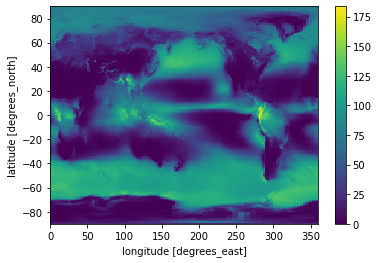

In [41]:
# shortwave 
sd.mean(dim='time').plot()

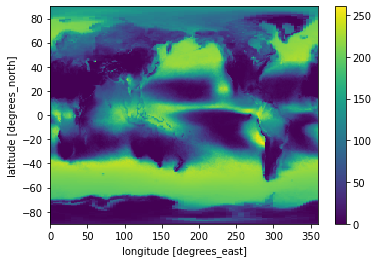

In [42]:
# longwave 
ld.mean(dim='time').plot()

In [43]:
sd.weighted(weights).mean()

<xarray.DataArray ()>
array(48.82009014)

In [44]:
ld.weighted(weights).mean()

<xarray.DataArray ()>
array(96.13197539)

# Problem 3.1

In [45]:
ds = xr.open_dataset("MERRA2_100.tavgU_2d_aer_Nx.198001.nc4", engine="netcdf4")

In [46]:
ds

<xarray.Dataset>
Dimensions:    (lon: 576, lat: 361, time: 24)
Coordinates:
  * lon        (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat        (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * time       (time) datetime64[ns] 1980-01-01T00:30:00 ... 1980-01-01T23:30:00
Data variables: (12/50)
    BCANGSTR   (time, lat, lon) float32 ...
    BCCMASS    (time, lat, lon) float32 ...
    BCEXTTAU   (time, lat, lon) float32 ...
    BCFLUXU    (time, lat, lon) float32 ...
    BCFLUXV    (time, lat, lon) float32 ...
    BCSCATAU   (time, lat, lon) float32 ...
    ...         ...
    SUFLUXU    (time, lat, lon) float32 ...
    SUFLUXV    (time, lat, lon) float32 ...
    SUSCATAU   (time, lat, lon) float32 ...
    TOTANGSTR  (time, lat, lon) float32 ...
    TOTEXTTAU  (time, lat, lon) float32 ...
    TOTSCATAU  (time, lat, lon) float32 ...
Attributes: (12/30)
    History:                           Original file generated: Thu May  7 21...
    Filename:                          MERRA2_100.tavgU_2d_aer_Nx.198001.nc4
    Comment:                           GMAO filename: d5124_m2_jan79.tavg1_2d...
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    DataResolution:                    0.5 x 0.625
    Source:                            CVS tag: GEOSadas-5_12_4
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/KPUMVXFEQLA1
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:59:59.000000

In [47]:
# monthly seasonal cycle removed.
tas_clim = ds.SUFLUXU.groupby('time.month').mean()
tas_clim

<xarray.DataArray 'SUFLUXU' (month: 1, lat: 361, lon: 576)>
array([[[1.8722445e-06, 1.8722445e-06, 1.8722445e-06, ...,
         1.8722445e-06, 1.8722445e-06, 1.8722445e-06],
        [1.7018242e-06, 1.7140488e-06, 1.7140488e-06, ...,
         1.6809616e-06, 1.6809616e-06, 1.6809616e-06],
        [1.4768681e-06, 1.4768681e-06, 1.4768681e-06, ...,
         1.4768681e-06, 1.4768681e-06, 1.4768681e-06],
        ...,
        [2.7572927e-05, 2.7572927e-05, 2.7572927e-05, ...,
         2.7572927e-05, 2.7572927e-05, 2.7572927e-05],
        [2.4675728e-05, 2.4536843e-05, 2.4536843e-05, ...,
         2.4980089e-05, 2.4980089e-05, 2.4980089e-05],
        [2.2436163e-05, 2.2436163e-05, 2.2436163e-05, ...,
         2.2436163e-05, 2.2436163e-05, 2.2436163e-05]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * month    (month) int64 1

In [48]:
group_data = ds.SUFLUXU.groupby('time.month')

# Apply mean to grouped data, and then compute the anomaly 
tas_anom = group_data - group_data.mean(dim='time')
tas_anom



<xarray.DataArray 'SUFLUXU' (time: 24, lat: 361, lon: 576)>
array([[[ 4.31741796e-07,  4.31741796e-07,  4.31741796e-07, ...,
          4.31741796e-07,  4.31741796e-07,  4.31741796e-07],
        [ 3.40163979e-07,  3.47542141e-07,  3.47542141e-07, ...,
          3.29609406e-07,  3.29609406e-07,  3.29609406e-07],
        [ 2.60434831e-07,  2.60434831e-07,  2.60434831e-07, ...,
          2.60434831e-07,  2.60434831e-07,  2.60434831e-07],
        ...,
        [ 5.72194585e-06,  5.72194585e-06,  5.72194585e-06, ...,
          5.72194585e-06,  5.72194585e-06,  5.72194585e-06],
        [ 3.98084558e-06,  3.92872607e-06,  3.92872607e-06, ...,
          4.09512904e-06,  4.09512904e-06,  4.09512904e-06],
        [ 3.14158569e-06,  3.14158569e-06,  3.14158569e-06, ...,
          3.14158569e-06,  3.14158569e-06,  3.14158569e-06]],

       [[ 4.69234806e-07,  4.69234806e-07,  4.69234806e-07, ...,
          4.69234806e-07,  4.69234806e-07,  4.69234806e-07],
        [ 3.83631459e-07,  3.89492584e-07,  3.89492584e-07, ...,
          3.73550051e-07,  3.73550051e-07,  3.73550051e-07],
        [ 3.08491394e-07,  3.08491394e-07,  3.08491394e-07, ...,
          3.08491394e-07,  3.08491394e-07,  3.08491394e-07],
...
          6.64816798e-06,  6.64816798e-06,  6.64816798e-06],
        [ 5.89184674e-06,  5.84241570e-06,  5.84241570e-06, ...,
          5.99692976e-06,  5.99692976e-06,  5.99692976e-06],
        [ 5.11308826e-06,  5.11308826e-06,  5.11308826e-06, ...,
          5.11308826e-06,  5.11308826e-06,  5.11308826e-06]],

       [[ 2.78546395e-08,  2.78546395e-08,  2.78546395e-08, ...,
          2.78546395e-08,  2.78546395e-08,  2.78546395e-08],
        [ 1.36852805e-08,  1.41893679e-08,  1.41893679e-08, ...,
          1.19952119e-08,  1.19952119e-08,  1.19952119e-08],
        [ 3.05622052e-08,  3.05622052e-08,  3.05622052e-08, ...,
          3.05622052e-08,  3.05622052e-08,  3.05622052e-08],
        ...,
        [ 5.54047620e-06,  5.54047620e-06,  5.54047620e-06, ...,
          5.54047620e-06,  5.54047620e-06,  5.54047620e-06],
        [ 3.79024641e-06,  3.71814167e-06,  3.71814167e-06, ...,
          3.95223833e-06,  3.95223833e-06,  3.95223833e-06],
        [ 2.60655543e-06,  2.60655543e-06,  2.60655543e-06, ...,
          2.60655543e-06,  2.60655543e-06,  2.60655543e-06]]],
      dtype=float32)
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * time     (time) datetime64[ns] 1980-01-01T00:30:00 ... 1980-01-01T23:30:00
    month    int64 1

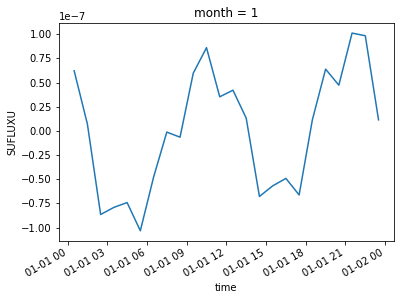

In [49]:
# Plot global mean anomalies
# SO4 column u-wind mass flux
tas_anom.mean(dim=['lat', 'lon']).plot()

# Problem 3.2

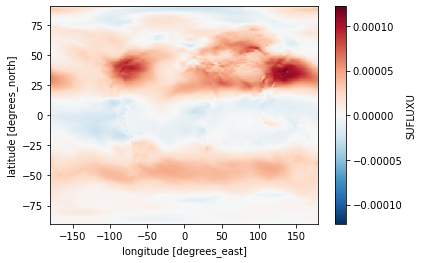

In [50]:
ds.SUFLUXU.mean(dim='time').plot()

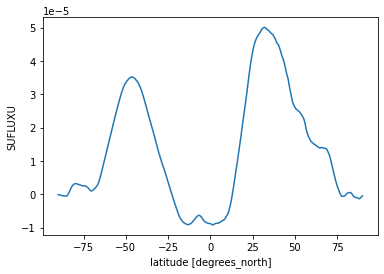

In [51]:
ds.SUFLUXU.mean(dim=['time','lon']).plot()

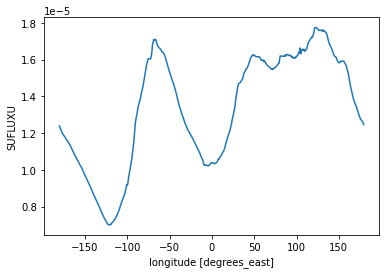

In [52]:
ds.SUFLUXU.mean(dim=['time','lat']).plot()

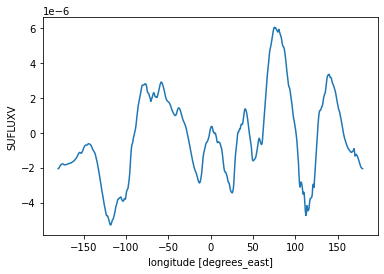

In [53]:
ds.SUFLUXV.mean(dim=['time','lat']).plot()

In [54]:
# I got inspired by reading http://xarray.pydata.org/en/stable/examples/weather-data.html

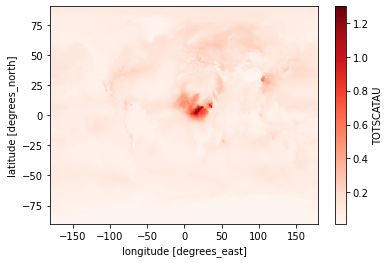

In [55]:
cmap = plt.cm.Reds
ds.TOTSCATAU.mean(dim='time').plot(cmap=cmap)

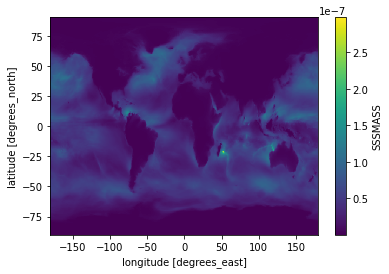

In [56]:
ds.SSSMASS.mean(dim='time').plot()